In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow.keras as tf

In [24]:
ratings_df = pd.read_csv("/content/ratings.csv")
books_df = pd.read_csv("/content/books.csv")

In [25]:

ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [26]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [27]:
print(ratings_df.shape)
print(ratings_df.user_id.nunique())
print(ratings_df.book_id.nunique())
ratings_df.isna().sum()

(981756, 3)
53424
10000


book_id    0
user_id    0
rating     0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest = train_test_split(ratings_df, test_size=0.2, random_state=1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


Creating a neural network

In [29]:
#Get the number of unique entities in books and users columns
nbook_id = ratings_df.book_id.nunique()
nuser_id = ratings_df.user_id.nunique()


#Book input network
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id + 1,15)(input_books)
books_out = tf.layers.Flatten()(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id + 1,15)(input_users)
users_out = tf.layers.Flatten()(embed_users)

conc_layer = tf.layers.Concatenate()([books_out, users_out])
x = tf.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tf.layers.Dense(1, activation='relu')(x)

model = tf.Model([input_books, input_users], x_out)

opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

In [30]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 15)        150015      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        801375      input_4[0][0]                    
____________________________________________________________________________________________

In [31]:
hist = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.book_id, Xtest.user_id], Xtest.rating))

Epoch 1/5
12272/12272 [==============================] - 65s 5ms/step - loss: 0.8636 - val_loss: 0.7122
Epoch 2/5
12272/12272 [==============================] - 63s 5ms/step - loss: 0.6828 - val_loss: 0.6995
Epoch 3/5
12272/12272 [==============================] - 64s 5ms/step - loss: 0.6469 - val_loss: 0.6940
Epoch 4/5
12272/12272 [==============================] - 65s 5ms/step - loss: 0.6178 - val_loss: 0.7031
Epoch 5/5
12272/12272 [==============================] - 65s 5ms/step - loss: 0.5895 - val_loss: 0.7148


In [32]:
model1 = tf.Model([input_books, input_users], x_out)
opt = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0)
model1.compile(optimizer=opt, loss='mean_squared_error')

In [33]:
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 15)        150015      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        801375      input_4[0][0]                    
____________________________________________________________________________________________

In [34]:
hist1 = model1.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.book_id, Xtest.user_id], Xtest.rating))

Epoch 1/5
12272/12272 [==============================] - 43s 3ms/step - loss: 0.5109 - val_loss: 0.7375
Epoch 2/5
12272/12272 [==============================] - 42s 3ms/step - loss: 0.5057 - val_loss: 0.7398
Epoch 3/5
12272/12272 [==============================] - 41s 3ms/step - loss: 0.5033 - val_loss: 0.7442
Epoch 4/5
12272/12272 [==============================] - 41s 3ms/step - loss: 0.5014 - val_loss: 0.7454
Epoch 5/5
12272/12272 [==============================] - 42s 3ms/step - loss: 0.4997 - val_loss: 0.7475


In [35]:
model2 = tf.Model([input_books, input_users], x_out)
opt = tf.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)
model2.compile(optimizer=opt, loss='mean_squared_error')

In [36]:
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 15)        150015      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        801375      input_4[0][0]                    
____________________________________________________________________________________________

In [37]:
hist2 = model2.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.book_id, Xtest.user_id], Xtest.rating))

Epoch 1/5
12272/12272 [==============================] - 53s 4ms/step - loss: 0.4964 - val_loss: 0.7448
Epoch 2/5
12272/12272 [==============================] - 50s 4ms/step - loss: 0.4959 - val_loss: 0.7453
Epoch 3/5
12272/12272 [==============================] - 51s 4ms/step - loss: 0.4955 - val_loss: 0.7452
Epoch 4/5
12272/12272 [==============================] - 52s 4ms/step - loss: 0.4951 - val_loss: 0.7454
Epoch 5/5
12272/12272 [==============================] - 51s 4ms/step - loss: 0.4948 - val_loss: 0.7450


In [38]:
hist.history

{'loss': [0.8636473417282104,
  0.6827901601791382,
  0.6469165682792664,
  0.6177660226821899,
  0.5895445346832275],
 'val_loss': [0.7121912837028503,
  0.6995062828063965,
  0.693987250328064,
  0.7030938267707825,
  0.7147871851921082]}

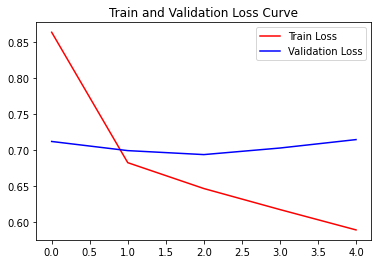

In [39]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.savefig("loss.png")
plt.show()

In [40]:
hist1.history

{'loss': [0.5108659267425537,
  0.5056573748588562,
  0.5033488273620605,
  0.5014481544494629,
  0.49971938133239746],
 'val_loss': [0.7375156283378601,
  0.7397984266281128,
  0.7442470788955688,
  0.7453632950782776,
  0.7475120425224304]}

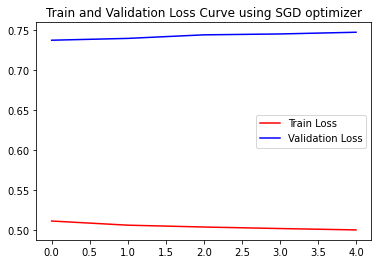

In [41]:
train_loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve using SGD optimizer")
plt.legend()
plt.savefig("loss.png")
plt.show()

In [42]:
hist2.history

{'loss': [0.49640440940856934,
  0.4958769977092743,
  0.495492160320282,
  0.49513328075408936,
  0.4947896897792816],
 'val_loss': [0.7447974681854248,
  0.7452656030654907,
  0.7451555728912354,
  0.7454050779342651,
  0.745039701461792]}

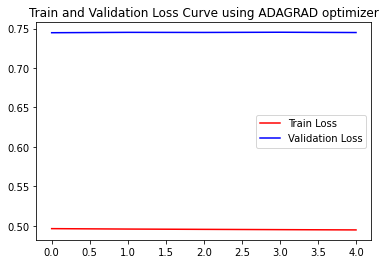

In [43]:
train_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve using ADAGRAD optimizer")
plt.legend()
plt.savefig("loss.png")
plt.show()

In [44]:
#save the model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


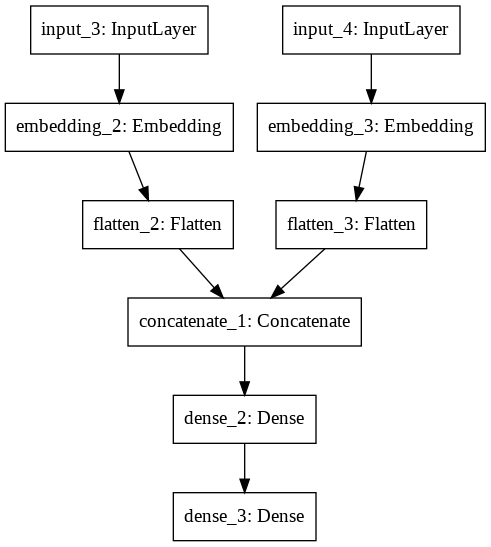

In [45]:
tf.utils.plot_model(model)

EXTRACT EMBEDDING LAYERS AND MAPPING FOR VISUALIZATION IN TENSORFLOW EMBEDDING PROJECTOR

In [48]:
# Extract embeddings
book_em = model.get_layer('embedding_2')
book_em_weights = book_em.get_weights()[0]

In [49]:
book_em_weights.shape

(10001, 15)

In [50]:
books_df_copy = books_df.copy()
books_df_copy = books_df_copy.set_index("book_id")
books_df_copy.head(2)

,id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,,
2767052,1,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
3,2,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [51]:
b_id =list(ratings_df.book_id.unique())
b_id.remove(10000)

In [52]:
dict_map = {}
for i in b_id:
    dict_map[i] = books_df_copy.iloc[i]['title']
    
out_v = open('vecs.tsv', 'w')
out_m = open('meta.tsv', 'w')

for i in b_id:
    book = dict_map[i]
    embeddings = book_em_weights[i]
    out_m.write(book + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    
out_v.close()
out_m.close()

MAKING PREDICTIONS

In [53]:
book_arr = np.array(b_id)
user = np.array([53424 for i in range(len(b_id))])
pred = model.predict([book_arr, user])

In [54]:
pred

array([[4.4909635],
       [4.9814157],
       [3.1756487],
       ...,
       [4.7309074],
       [4.816581 ],
       [3.5277166]], dtype=float32)

In [55]:
pred = pred.reshape(-1)
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([4060, 2630, 2159, 5848, 6064])

In [56]:
ratings_df.user_id.nunique()

53424

In [57]:
books_df.iloc[pred_ids]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
4060,4061,744615,744615,730764,24,1932664491,9.781933e+12,"Bryan Lee O'Malley, Steve Buccellato",2007.0,"Scott Pilgrim, Volume 4: Scott Pilgrim Gets It...","Scott Pilgrim, Volume 4: Scott Pilgrim Gets It...",NaN,4.32,27532,28873,808,137,463,3629,10445,14199,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2630,2631,29394,29394,6614461,27,441014348,9.780441e+12,Jim Butcher,2006.0,Cursor's Fury,"Cursor's Fury (Codex Alera, #3)",eng,4.36,41344,45918,1126,130,537,4858,17448,22945,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2159,2160,12499290,12499290,17484647,35,031607991X,9.780316e+12,Brent Weeks,2012.0,The Blinding Knife,"The Blinding Knife (Lightbringer, #2)",eng,4.45,42445,47269,1581,135,514,3637,16495,26488,https://images.gr-assets.com/books/1338432693m...,https://images.gr-assets.com/books/1338432693s...
5848,5849,8477057,8477057,13341979,24,1401229697,9.781401e+12,"Fábio Moon, Gabriel Bá, Craig Thompson, Dave S...",2011.0,Daytripper,Daytripper,eng,4.31,17679,18567,1725,264,672,2223,5308,10100,https://images.gr-assets.com/books/1327876816m...,https://images.gr-assets.com/books/1327876816s...
6064,6065,4005310,4005310,4051626,34,670020532,9.780670e+12,Jerry A. Coyne,2008.0,Why Evolution Is True,Why Evolution Is True,NaN,4.15,14637,15439,699,338,647,2387,5030,7037,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
